# 1.B Geçmiş Depremler Konum-Büyüklük Grafikleri Oluşturulması
## Veri Kaynakları
- Depremler: Kandilli Rasathanesi
## Anlatı Kaynakları

In [2]:
import pandas
import geopandas
import matplotlib
import matplotlib.pyplot as plt

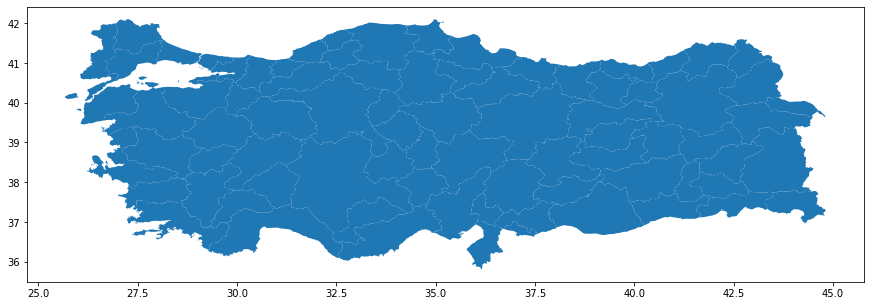

In [3]:
base_turkey = geopandas.read_file("../shp/tur_adm1.shp")
base_turkey_plot = base_turkey.plot(figsize=(15,15))

In [4]:
earthquakes = pandas.read_csv("../Data/TurTumDepremler1900.csv", sep="\t", engine="python")

In [5]:
earthquakes

No         Deprem Kodu Olus tarihi  Olus zamani    Enlem   Boylam  \
0          1  20191229112006  2019.12.29  11:20:06.59  40.3462  42.1595   
1          2  20191227070225  2019.12.27  07:02:25.38  38.3513  38.9847   
2          3  20191222235802  2019.12.22  23:58:02.23  39.4555  40.0313   
3          4  20191210215826  2019.12.10  21:58:26.73  35.3425  26.5243   
4          5  20191210204618  2019.12.10  20:46:18.06  39.4522  27.9150   
...      ...             ...         ...          ...      ...      ...   
6556    6557  19010501000001  1901.05.01  00:00:01.00  37.8000  27.8000   
6557    6558  19010401000001  1901.04.01  00:00:01.00  38.4000  31.4000   
6558    6559  19010301000001  1901.03.01  00:00:01.00  38.2000  27.7000   
6559    6560  19010223000000  1901.02.23  00:00:00.00  37.9000  27.9000   
6560    6561  19000920000001  1900.09.20  00:00:01.00  37.8000  29.1000   

      Der(km)   xM   MD   ML   Mw   Ms   Mb Tip  \
0         5.0  4.3  0.0  4.2  4.3  0.0  0.0  Ke   
1         4.5  5.1  0.0  5.1  4.8  0.0  0.0  Ke   
2         5.0  4.3  0.0  4.3  4.3  0.0  0.0  Ke   
3        86.7  5.3  0.0  5.3  5.1  0.0  0.0  Ke   
4         8.7  4.3  0.0  4.3  4.1  0.0  0.0  Ke   
...       ...  ...  ...  ...  ...  ...  ...  ..   
6556     15.0  5.0  5.0  0.0  NaN  0.0  0.0  Ke   
6557      5.0  5.0  5.0  0.0  NaN  0.0  0.0  Ke   
6558      5.0  5.0  5.0  0.0  NaN  0.0  0.0  Ke   
6559     15.0  4.8  4.7  4.6  4.8  4.6  4.7  Ke   
6560      5.0  5.0  5.0  0.0  NaN  0.0  0.0  Ke   

                                                   Yer  
0       GULLUDAG-NARMAN (ERZURUM) [South East  3.7 km]  
1     TOPALUSAGI-SIVRICE (ELAZIG) [North East  0.3 km]  
2       KIRKLAR-PULUMUR (TUNCELI) [South West  1.8 km]  
3                                GIRIT ADASI (AKDENIZ)  
4              BAYAT- (BALIKESIR) [North East  1.9 km]  
...                                                ...  
6556             KADIKOY- (AYDIN) [South West  2.6 km]  
6557      ATAKENT-AKSEHIR (KONYA) [North East  2.4 km]  
6558     YAKACIK-BAYINDIR (IZMIR) [South West  0.8 km]  
6559              KENGER- (AYDIN) [North East  1.1 km]  
6560            DENIZLI (DENIZLI) [North East  2.3 km]  

[6561 rows x 15 columns]

In [6]:
# NaN veri (missing value) kontrolü yapılıyor.

print(earthquakes[earthquakes["Enlem"].isnull()].shape)
print(earthquakes[earthquakes["Boylam"].isnull()].shape)
print(earthquakes[earthquakes["xM"].isnull()].shape)
print(earthquakes[earthquakes["Olus tarihi"].isnull()].shape)

(0, 15)
(0, 15)
(0, 15)
(0, 15)


In [7]:
geo_eq = geopandas.GeoDataFrame(earthquakes, 
                               geometry = geopandas.points_from_xy(earthquakes["Boylam"], earthquakes["Enlem"]))

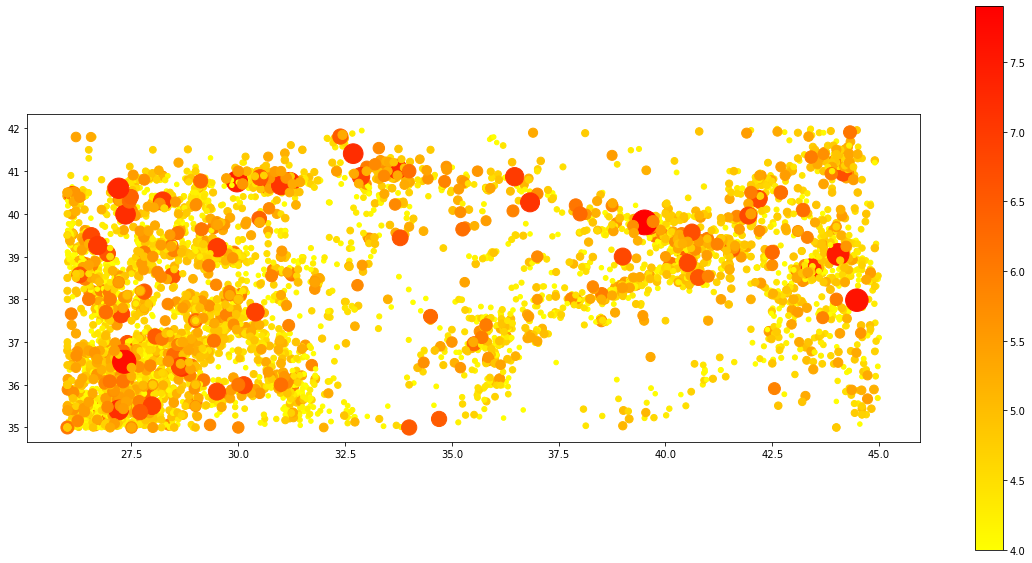

In [11]:
marker_size = (geo_eq["xM"]**5)/50
geo_eq.plot(figsize=(20,10), column="xM", marker="o", legend=True, markersize=marker_size, cmap=matplotlib.cm.get_cmap('autumn_r'))

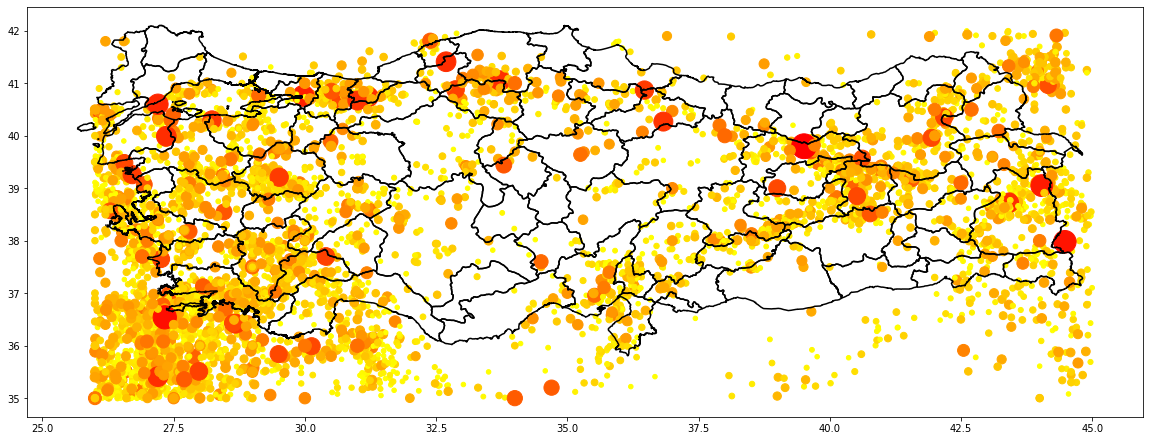

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

base_turkey.boundary.plot(ax=ax, color="black")
geo_eq.plot(ax=ax, column="xM", marker="o", markersize=marker_size, cmap=matplotlib.cm.get_cmap('autumn_r'))


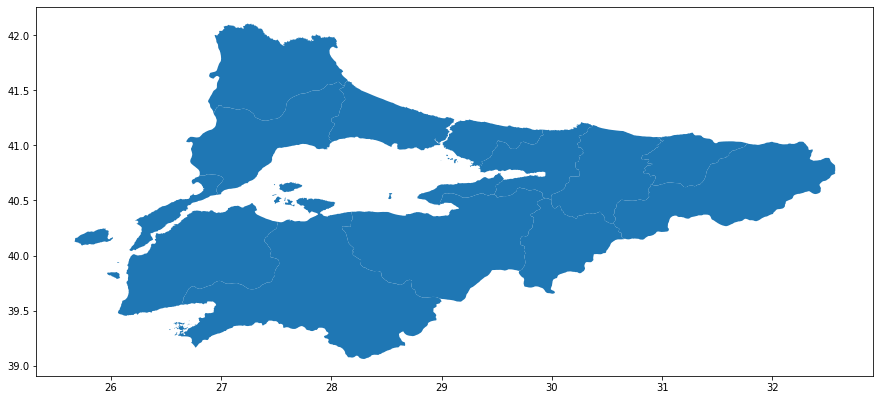

In [14]:
marmara = base_turkey.cx[27:31, 40.25:42]
marmara.plot(figsize=(15,15))

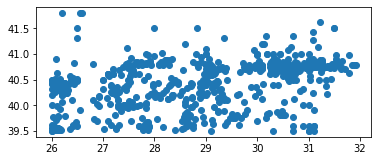

In [15]:
eq_marmara = geo_eq.cx[26:32, 39.5:42]
eq_marmara.plot()

Text(101.75, 0.5, 'Enlem')

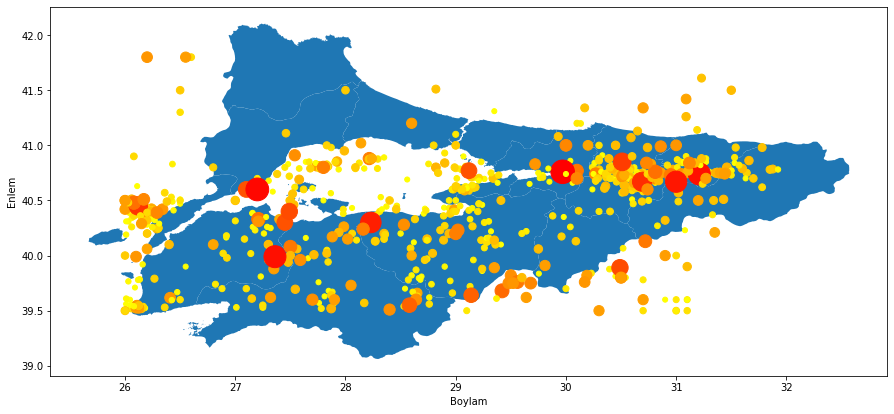

In [20]:
marker_size = (eq_marmara["xM"]**5)/40
n=eq_marmara.plot(ax=marmara.plot(figsize=(15,15)), figsize=(15,15), markersize=marker_size, column="xM", cmap=matplotlib.cm.get_cmap('autumn_r'))
n.set_xlabel("Boylam")
n.set_ylabel("Enlem")